In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('driver_events.csv')
con = sqlite3.connect(":memory:")
df.to_sql('driver_events', con)
pysql = lambda q: pd.read_sql_query(q, con)

In [3]:
df.head()

,day,country,warehouse,driver_id,order_id,event
0,2018-06-30,KSA,Mecca,1241520270,48677033,delivered
1,2018-06-30,KSA,Mecca,1241520270,48677033,dispatched
2,2018-05-01,KSA,Mecca,3166041636,773619769,delivered
3,2018-05-01,KSA,Mecca,3166041636,773619769,dispatched
4,2018-05-05,KSA,Dammam,1769413672,3138747673,delivered


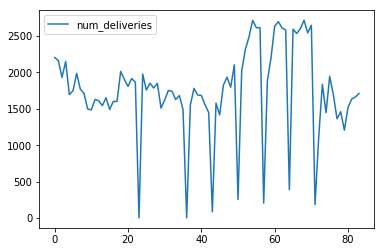

In [8]:
pysql("""
    SELECT
        day,
        COUNT(*) AS num_deliveries
    FROM
        driver_events
    WHERE
        event = 'delivered'
    GROUP BY
        1
""").plot()